In [1]:
# --- Load all the required libraries ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# --- 1. LOAD THE PREPARED DATASET ---

print("--> Loading the cleaned CICIDS2017 dataset...")
try:
    df = pd.read_parquet("D:/IoC-Free IDS using ML and NLP/data/processed/cicids2017_cleaned_standardized.parquet")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'cicids2017_cleaned_standardized.parquet' not found.")
    print("Please make sure you have run the data cleaning notebook first.")
    exit()

--> Loading the cleaned CICIDS2017 dataset...
Dataset loaded successfully!


In [3]:
# --- 2. PREPARE DATA FOR MODELING ---

print("\n--> Preparing data for the model...")

# Separate features (X) from the target label (y)

X = df.drop('label', axis = 1)
y_text = df['label']

# Encode the text labels into numerical format (e.g., 'BENIGN' -> 0, 'DDoS' -> 1)

le = LabelEncoder()
y = le.fit_transform(y_text)
print(f"Labels encoded. Found {len(le.classes_)} classes.")

# Split the dataset into training and testing sets
# We use a smaller subset for faster training during development (e.g., 20%)
# For the final model, you might use the full dataset.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 8, stratify = y
)
print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows).")


--> Preparing data for the model...
Labels encoded. Found 15 classes.
Data split into training (1979513 rows) and testing (848363 rows).


In [4]:
# --- 3. TRAIN THE RANDOM FOREST CLASSIFIER ---

print("--> Training the Random Forest model...")

# n_estimators = number of trees in the forest
# n_jobs = -1 uses all available CPU cores for faster training

rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 8, n_jobs = -1)
rf_classifier.fit(X_train, y_train)
print("Model training complete.")

--> Training the Random Forest model...
Model training complete.


In [8]:
# --- 4. EVALUATE THE MODEL ---

print("\nEvaluating the model on test set...")
y_pred = rf_classifier.predict(X_test)

# Convert numerical predictions back to original text labels for readability

y_pred_text = le.inverse_transform(y_pred)
y_test_text = le.inverse_transform(y_test)

# Print evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_text, digits = 4))


Evaluating the model on test set...

Accuracy: 0.9986

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN     0.9995    0.9991    0.9993    681396
                       Bot     0.8113    0.8058    0.8085       587
                      DDoS     0.9996    0.9994    0.9995     38408
             DoS GoldenEye     0.9977    0.9942    0.9959      3088
                  DoS Hulk     0.9977    0.9985    0.9981     69037
          DoS Slowhttptest     0.9573    0.9915    0.9741      1650
             DoS slowloris     0.9977    0.9960    0.9968      1739
               FTP-Patator     1.0000    0.9983    0.9992      2380
                Heartbleed     1.0000    1.0000    1.0000         3
              Infiltration     1.0000    0.7273    0.8421        11
                  PortScan     0.9938    0.9995    0.9966     47641
               SSH-Patator     0.9994    0.9921    0.9957      1769
  Web Attack � Brute Force     0.729


--> Generating confusion matrix...
Confusion matrix saved to 'network_confusion_matrix.png'


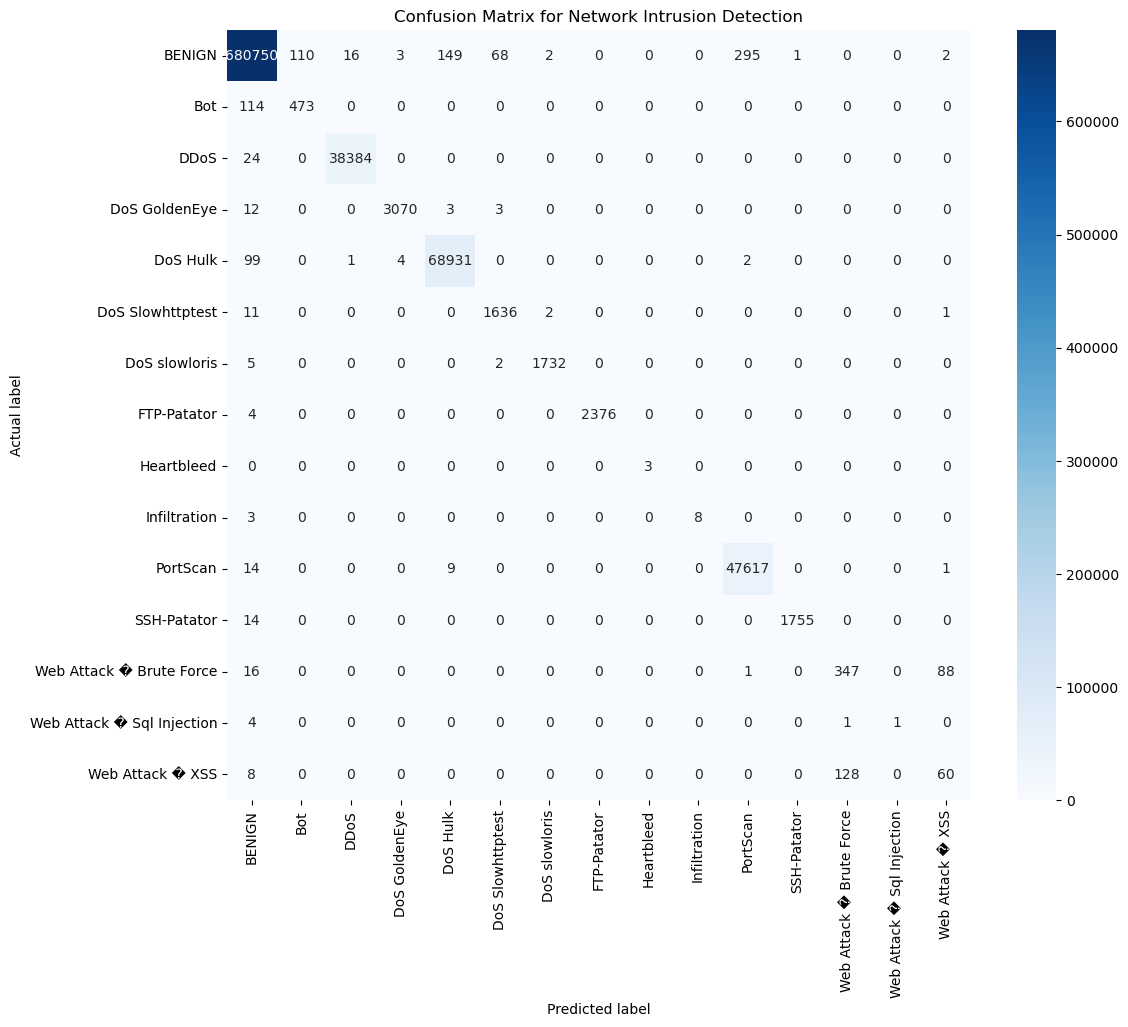

In [10]:
# --- 5. VISUALIZE THE CONFUSION MATRIX ---

print("\n--> Generating confusion matrix...")
cm = confusion_matrix(y_test_text, y_pred_text, labels = le.classes_)
plt.figure(figsize = (12, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = le.classes_, yticklabels = le.classes_)
plt.title("Confusion Matrix for Network Intrusion Detection")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.savefig("D:/IoC-Free IDS using ML and NLP/results/network_confusion_matrix.png")
print("Confusion matrix saved to 'network_confusion_matrix.png'")
plt.show()

In [12]:
# --- 6. SAVE THE TRAINED MODEL AND THE LABEL ENCODER ---

print("\n--> Saving the trained model and label encoder...")
joblib.dump(rf_classifier, 'D:/IoC-Free IDS using ML and NLP/initial_models/random_forest_network_model.joblib')
joblib.dump(le, 'D:/IoC-Free IDS using ML and NLP/initial_models/network_label_encoder.joblib')
print("✅ Model and Encoder saved successfully!")


--> Saving the trained model and label encoder...
✅ Model and Encoder saved successfully!
